# Messing around with the Data

In [160]:
import pandas as pd

In [161]:
dept_comp_df = pd.read_excel("./Department_Comparison.xlsx")

In [162]:
dept_seattle = pd.read_csv("City_of_Seattle_Wage_Data.csv")

In [163]:
dept_seattle

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Office of Housing,Gould,Ian,Property Rehab Spec,47.080
1,Office of Housing,Kremer,Madison,"Com Dev Spec,Sr",56.390
2,Office of Housing,Wolff,Sandra,"Dev Fin Spec,Sr",50.200
3,Office of Housing,Barker,Lacey,"Com Dev Spec,Sr",58.650
4,Office of Housing,Laird,Danthanh,"Fin Anlyst,Sr",58.370
...,...,...,...,...,...
12722,Seattle City Light,Fitzgerald,Matthew,Prot&Cntrl Elctn CC,79.740
12723,Seattle City Light,Webster,John,"MatSup,Elec-Asg OPVTCHBNSTR",43.770
12724,Seattle City Light,Tapia,Rene,Info Technol Prof A BU,63.000
12725,Seattle City Light,Hui,Wingfai,Info Technol Prof B-BU,68.192


In [164]:
!pip install gender-guesser

In [165]:
import gender_guesser.detector as gender
d = gender.Detector()
dept_seattle["gender"] = dept_seattle["First Name"].apply(lambda x: d.get_gender(x))
dept_seattle['gender'] = dept_seattle['gender'].replace('mostly_female', 'female')
dept_seattle['gender'] = dept_seattle['gender'].replace('mostly_male', 'male')

In [166]:
dept_seattle["gender"].value_counts()

gender
male       6882
female     3980
unknown    1654
andy        211
Name: count, dtype: int64

In [167]:
dept_seattle[dept_seattle["gender"] == "unknown"]

,Department,Last Name,First Name,Job Title,Hourly Rate,gender
4,Office of Housing,Laird,Danthanh,"Fin Anlyst,Sr",58.370,unknown
19,Seattle Public Utilities,Taumoepeau,Meleane,Util Act Rep I,31.940,unknown
24,Seattle Public Utilities,Larsen,Yu-Lung,"Mgmt Systs Anlyst,Sr",60.830,unknown
26,Seattle Public Utilities,Karki,Riwaz,"Civil Engr,Asst I",44.100,unknown
28,Seattle Public Utilities,Valmonte,Arnel,"Capital Prjts Coord,Sr",69.480,unknown
...,...,...,...,...,...,...
12675,Construction & Inspections,Phasomsap,Ganjana,Permit Tech,39.490,unknown
12684,Seattle City Light,Barrington,Mary Grace,"Civil Engr,Assoc",64.500,unknown
12691,Seattle City Light,Amin,Bilkis,"Elecl Engrng Spec,Asst I",40.000,unknown
12692,Seattle City Light,Buckley,Chiffon,Cust Svc Rep,34.780,unknown


In [168]:
dept_seattle.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate ',
       'gender'],
      dtype='object')

In [169]:
dept_seattle['Last Name'].value_counts()

Last Name
Johnson      90
Nguyen       89
Smith        82
Lee          64
Anderson     59
             ..
Al-Rashid     1
Valencia      1
Van Thiel     1
Deittrick     1
Hui           1
Name: count, Length: 7744, dtype: int64

In [170]:
last_name_counts = dept_seattle['Last Name'].value_counts()

last_name_counts_filtered = last_name_counts[last_name_counts > 5]

In [171]:
last_name_counts_filtered

Last Name
Johnson      90
Nguyen       89
Smith        82
Lee          64
Anderson     59
             ..
Oliver        6
Porter        6
Ness          6
Zimmerman     6
Conrad        6
Name: count, Length: 242, dtype: int64

In [172]:
for department, data in dept_seattle.groupby("Department"):
    print(f"Group for department '{department}':")
    # print(data)

Group for department 'Arts & Culture':
Group for department 'City Auditor':
Group for department 'City Budget Office':
Group for department 'City of Seattle':
Group for department 'Civil Service Commissions':
Group for department 'Commnty Sfty and Comm Ctr Dept':
Group for department 'Community Police Commission':
Group for department 'Construction & Inspections':
Group for department 'Econ & Revenue Forecasts Dept':
Group for department 'Education & Early Learning':
Group for department 'Employees' Retirement System':
Group for department 'Ethics & Elections Commission':
Group for department 'Finance & Admin Services':
Group for department 'Fire Department':
Group for department 'Hearing Examiner':
Group for department 'Human Services Department':
Group for department 'Immigrant & Refugee Affairs':
Group for department 'Information Technology':
Group for department 'Intergovernment Relations':
Group for department 'Legislative Department':
Group for department 'Mayor's Office':
Group 

# Data Cleaning

In [2]:
!pip install sodapy

  Using cached sodapy-2.2.0-py2.py3-none-any.whl.metadata (15 kB)
Using cached sodapy-2.2.0-py2.py3-none-any.whl (15 kB)


In [3]:
import pandas as pd
from sodapy import Socrata

client = Socrata("controllerdata.lacity.org", None)
results = client.get("g9h8-fvhu", limit=140000)

results_df = pd.DataFrame.from_records(results)

# FTE works 40 hours, assuming holidays and PTO rate of 0.0461, they work 1870 hours a year

In [4]:
cleaned_la_df = results_df[(results_df["employment_type"] != "PART_TIME") & (results_df["job_status"] != "NOT_ACTIVE")]
[["last_name", "first_name", "fms_dept", "fms_department_title", "job_title", "mou", "mou_title", "regular_pay", "gender", "ethnicity"]]

[['last_name',
  'first_name',
  'fms_dept',
  'fms_department_title',
  'job_title',
  'mou',
  'mou_title',
  'regular_pay',
  'gender',
  'ethnicity']]

In [5]:
# give them an hourly wage
cleaned_la_df["regular_pay"] = cleaned_la_df["regular_pay"].astype(float)
cleaned_la_df["hourly_pay"] = cleaned_la_df["regular_pay"] / (1870)

/tmp/ipykernel_99/1948672514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_la_df["regular_pay"] = cleaned_la_df["regular_pay"].astype(float)
/tmp/ipykernel_99/1948672514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_la_df["hourly_pay"] = cleaned_la_df["regular_pay"] / (1870)


In [8]:
cleaned_la_df

,record_nbr,pay_year,last_name,first_name,fms_dept,fms_department_title,job_class_pgrade,job_title,employment_type,job_status,...,mou_title,regular_pay,overtime_pay,all_other_pay,total_pay,city_retirement_contributions,benefit_pay,gender,ethnicity,hourly_pay
0,303030303233,2017,ESCOBEDO,JOSE,70,POLICE,2214-2,POLICE OFFICER II,FULL_TIME,ACTIVE,...,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,5835.35,2241.75,99703.95,27042.1,16819.0,MALE,HISPANIC,48.998316
1,3030303032,2017,VILLEGAS,JOSE,44,LIBRARY,1172-1,LIBRARY ASSISTANT I,FULL_TIME,ACTIVE,...,CLERICAL,65332.56,0.0,0.0,65332.56,19377.64,7528.44,MALE,HISPANIC,34.937198
3,3030303035,2017,BAUTISTA,RONALD,88,RECREATION AND PARKS,3141-0,GARDENER CARETAKER,FULL_TIME,ACTIVE,...,EQUIPMENT OPERATION AND LABOR,55628.80,2129.02,200.0,57957.82,16499.5,14946.17,MALE,HISPANIC,29.748021
4,3030303037,2017,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,9191-1,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,FULL_TIME,ACTIVE,...,TECHNICAL,132912.00,0.0,350.0,133262.0,39421.7,6446.75,FEMALE,HISPANIC,71.075936
7,3030303131,2017,MINETTA,VICTORIA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,9207-0,HUMAN RELATIONS ADVOCATE,FULL_TIME,ACTIVE,...,ADMINISTRATIVE,92427.20,0.0,0.0,92427.2,27413.91,16777.89,FEMALE,CAUCASIAN,49.426310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139991,3230323132,2019,ROBLES,EDUARDO,42,HARBOR,1964-3,PROPERTY MANAGER III,FULL_TIME,ACTIVE,...,MANAGEMENT EMPLOYEES,170798.40,0.0,0.0,170798.4,50658.81,16794.96,MALE,HISPANIC,91.336043
139993,3230323134,2019,CASINO,GENE,4,AIRPORTS,3336-2,AIRPORTS MAINTENANCE SUPERVISOR II,FULL_TIME,ACTIVE,...,SUPERVISORY BLUE COLLAR,108337.52,18885.61,200.0,127423.13,32132.91,19398.0,MALE,CAUCASIAN,57.934503
139994,323032313533,2019,YORBA,FRANK,88,RECREATION AND PARKS,3141-0,GARDENER CARETAKER,FULL_TIME,ACTIVE,...,EQUIPMENT OPERATION AND LABOR,53603.20,1056.0,200.0,54859.2,15898.71,7987.92,MALE,HISPANIC,28.664813
139995,3230323135,2019,JOHNSON,JON,40,GENERAL SERVICES,3714-6,AUTOMOTIVE SUPERVISOR,FULL_TIME,ACTIVE,...,SUPERVISORY BLUE COLLAR,100932.80,11199.25,776.25,112908.3,29936.67,19731.84,MALE,CAUCASIAN,53.974759


In [7]:
cleaned_la_df["ethnicity"].value_counts()

ethnicity
HISPANIC             22033
CAUCASIAN            15521
BLACK                 8964
ASIAN                 5899
FILIPINO              2523
OTHER                  677
AMERICAN INDIAN        163
UNKNOWN                 88
TWO OR MORE RACES       20
PACIFIC ISLANDER         2
Name: count, dtype: int64

# The correlation between Gender and Wage in the Los Angeles City Employee Payroll Database.

In [178]:
df = cleaned_la_df

In [179]:
grouped_df = cleaned_la_df.groupby(["fms_department_title"])
avg_pay = {}

for group, group_data in grouped_df:
    avg_pay[group] = {"ppl in group": len(group_data), "pay": group_data["hourly_pay"].mean()}

In [180]:
def sample_group(df_group, n):
    return df_group.sample(n=n, random_state=42)

n_samples = 120

grouped_counts = df.groupby('fms_department_title').size()
filtered_groups = grouped_counts[grouped_counts > n_samples].index
filtered_df = df[df['fms_department_title'].isin(filtered_groups)]

sampled_df = filtered_df.groupby('fms_department_title').apply(sample_group, n=n_samples).reset_index(drop=True)

print(sampled_df)

       last_name first_name fms_dept fms_department_title  \
0      CARRETINO     JUDITH        4             AIRPORTS   
1     FESTEKJIAN       LENA        4             AIRPORTS   
2         LUERAS     JUSTIN        4             AIRPORTS   
3           VERA   GRACIELA        4             AIRPORTS   
4          ROCHE      CONOR        4             AIRPORTS   
...          ...        ...      ...                  ...   
3475     RECCHIO        IAN       87                  ZOO   
3476        BONA    MICHAEL       87                  ZOO   
3477       LYELL     ANDREW       87                  ZOO   
3478      BARNES      BRYCE       87                  ZOO   
3479       MORAN  FRANCISCO       87                  ZOO   

                                job_title mou                      mou_title  \
0                      GARDENER CARETAKER   4  EQUIPMENT OPERATION AND LABOR   
1                        AIRPORT GUIDE II   3                       CLERICAL   
2                        SE

In [181]:
grouped_df = sampled_df.groupby(["fms_department_title", "gender"])
avg_pay = {}

for group, group_data in grouped_df:
    avg_pay[group] = {"ppl in group": len(group_data), "pay": group_data["hourly_pay"].mean()}

In [182]:
!pip install seaborn

In [183]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

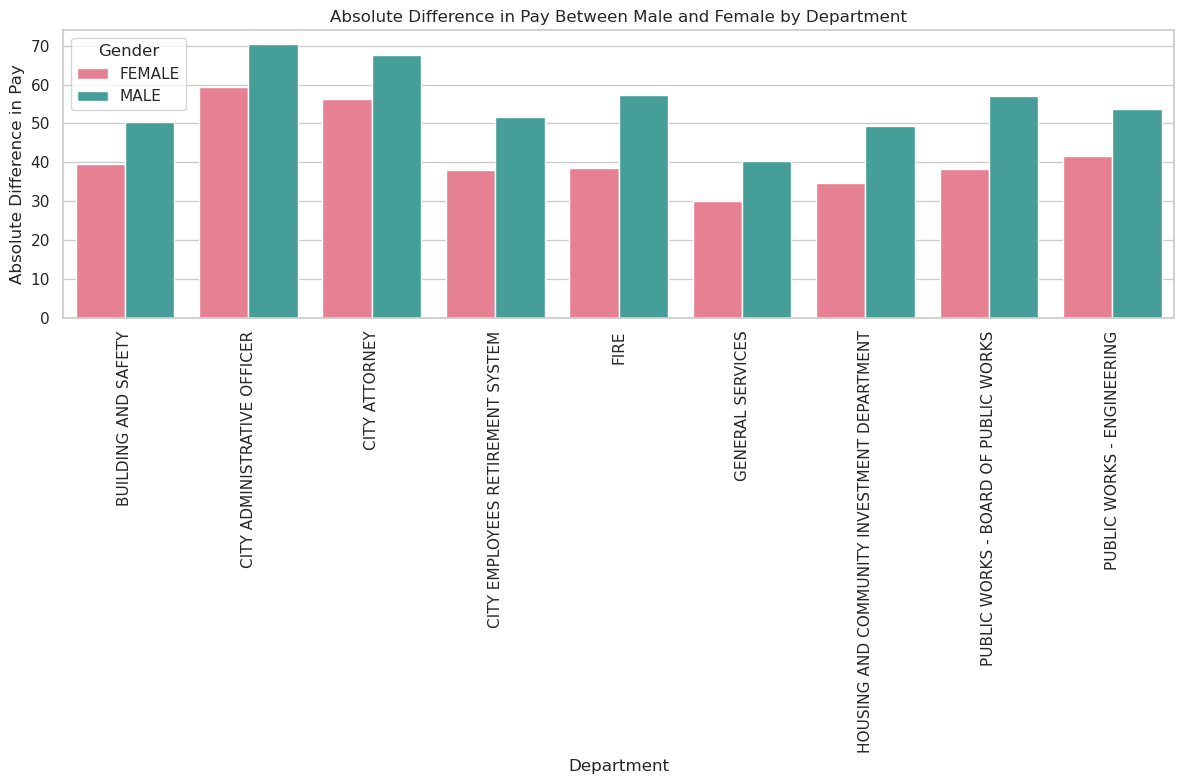

In [189]:
df = pd.DataFrame(avg_pay).T.reset_index()
df.columns = ['Department', 'Gender', 'ppl in group', 'Pay']

male_pay = df[df['Gender'] == 'MALE'].sort_values('Department')[['Department', 'Pay']]
female_pay = df[df['Gender'] == 'FEMALE'].sort_values('Department')[['Department', 'Pay']]

pay_difference = abs(male_pay.set_index('Department')['Pay'] - female_pay.set_index('Department')['Pay'])

pay_difference = pay_difference.reset_index()
pay_difference.columns = ['Department', 'Pay_Difference']

depts = pay_difference[pay_difference["Pay_Difference"] > 10]["Department"]

filtered_df = df[df['Department'].isin(depts)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, x='Department', y='Pay', hue="Gender", palette='husl')
plt.xticks(rotation=90)
plt.title('Absolute Difference in Pay Between Male and Female by Department')
plt.xlabel('Department')
plt.ylabel('Absolute Difference in Pay')
plt.tight_layout()
plt.savefig("diff_male_female_la.png")
plt.show()

In [59]:
male_pay = df[(df['Gender'] == 'MALE')]['Pay'].to_numpy()
female_pay = df[(df['Gender'] == 'FEMALE')]['Pay'].to_numpy()

t_stat, p_value = ttest_ind(male_pay, female_pay, equal_var=False)

# Typical signif value of 0.05

print(p_value)
print(p_value < 0.05)

0.02605505426476407
True


In [49]:
t_test_results_df

,Department,T-Statistic,P-Value
0,BUILDING AND SAFETY,NaN,NaN
1,CITY ADMINISTRATIVE OFFICER,NaN,NaN
2,CITY ATTORNEY,NaN,NaN
3,CITY EMPLOYEES RETIREMENT SYSTEM,NaN,NaN
4,FIRE,NaN,NaN
5,HARBOR,NaN,NaN
6,HOUSING AND COMMUNITY INVESTMENT DEPARTMENT,NaN,NaN
7,PUBLIC WORKS - BOARD OF PUBLIC WORKS,NaN,NaN


In [36]:
grouped_df = sampled_df.groupby(["fms_department_title", "ethnicity"])
avg_pay = {}
for group, group_data in grouped_df:
    avg_pay[group] = {"ppl in group" : len(group_data), "pay" : group_data["hourly_pay"].mean()}

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(avg_pay).T
df = df.reset_index()
df.columns = ["Department", "Ethnicity", "ppl_in_group", "Pay"]


In [62]:
df

,Department,Ethnicity,ppl_in_group,Pay
0,AIRPORTS,ASIAN,12.0,45.696338
1,AIRPORTS,BLACK,30.0,32.576104
2,AIRPORTS,CAUCASIAN,30.0,47.406789
3,AIRPORTS,FILIPINO,6.0,57.634795
4,AIRPORTS,HISPANIC,42.0,33.752703
...,...,...,...,...
180,ZOO,ASIAN,13.0,42.020214
181,ZOO,BLACK,6.0,38.799095
182,ZOO,CAUCASIAN,68.0,35.326346
183,ZOO,HISPANIC,29.0,29.578238


In [63]:
filtered_df = df[(df['Ethnicity'] != 'OTHER') & 
                       (df['Ethnicity'] != 'TWO OR MORE RACES') & 
                       (df['Ethnicity'] != 'UNKNOWN')]

In [64]:
filtered_df

,Department,Ethnicity,ppl_in_group,Pay
0,AIRPORTS,ASIAN,12.0,45.696338
1,AIRPORTS,BLACK,30.0,32.576104
2,AIRPORTS,CAUCASIAN,30.0,47.406789
3,AIRPORTS,FILIPINO,6.0,57.634795
4,AIRPORTS,HISPANIC,42.0,33.752703
...,...,...,...,...
177,TRANSPORTATION,HISPANIC,41.0,34.739398
180,ZOO,ASIAN,13.0,42.020214
181,ZOO,BLACK,6.0,38.799095
182,ZOO,CAUCASIAN,68.0,35.326346


In [65]:
filtered_df["Ethnicity"].value_counts()

Ethnicity
ASIAN              29
BLACK              29
CAUCASIAN          29
HISPANIC           29
FILIPINO           28
AMERICAN INDIAN     8
Name: count, dtype: int64

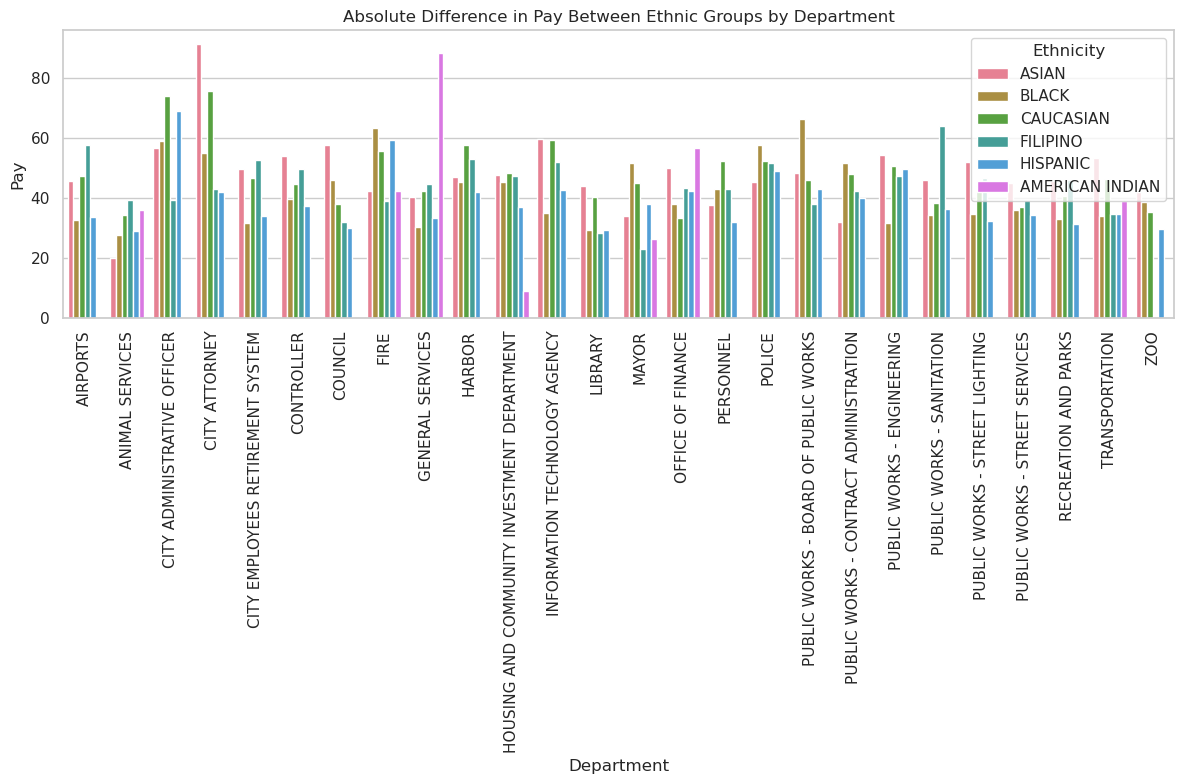

In [66]:
ethnicity_groups = filtered_df.pivot(index='Department', columns='Ethnicity', values='Pay')

pay_difference = ethnicity_groups.max(axis=1) - ethnicity_groups.min(axis=1)

pay_difference = pay_difference.reset_index()
pay_difference.columns = ['Department', 'Pay_Difference']

depts = pay_difference[pay_difference["Pay_Difference"] > 10]["Department"]

filt_df = filtered_df[filtered_df['Department'].isin(depts)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=filt_df, x='Department', y='Pay', hue="Ethnicity", palette='husl')
plt.xticks(rotation=90)
plt.title('Absolute Difference in Pay Between Ethnic Groups by Department')
plt.xlabel('Department')
plt.ylabel('Pay')
plt.tight_layout()
plt.savefig("diff_ethnicity_la.png")
plt.show()

In [81]:
t_test_results = []

ethnicities = filtered_df['Ethnicity'].unique()

for i, eth1 in enumerate(ethnicities):
    for eth2 in ethnicities[i+1:]:
        pay1 = filtered_df[filtered_df['Ethnicity'] == eth1]['Pay'].to_numpy()
        pay2 = filtered_df[filtered_df['Ethnicity'] == eth2]['Pay'].to_numpy()
        
        t_stat, p_value = ttest_ind(pay1, pay2, equal_var=False)
        
        t_test_results.append({
            'Ethnicity1': eth1,
            'Ethnicity2': eth2,
            'T-Statistic': t_stat,
            'P-Value': p_value,
            'Significant': p_value < 0.05
        })

t_test_results_df = pd.DataFrame(t_test_results)

print(t_test_results_df)
print()
print(t_test_results_df[t_test_results_df["Significant"] == True])

   Ethnicity1       Ethnicity2  T-Statistic   P-Value  Significant
0       ASIAN            BLACK     1.795647  0.078010        False
1       ASIAN        CAUCASIAN    -0.004878  0.996126        False
2       ASIAN         FILIPINO     1.293367  0.201685        False
3       ASIAN         HISPANIC     2.899538  0.005435         True
4       ASIAN  AMERICAN INDIAN     0.462069  0.656305        False
5       BLACK        CAUCASIAN    -1.947866  0.056460        False
6       BLACK         FILIPINO    -0.688039  0.494402        False
7       BLACK         HISPANIC     1.061562  0.293084        False
8       BLACK  AMERICAN INDIAN    -0.160812  0.876319        False
9   CAUCASIAN         FILIPINO     1.424825  0.159947        False
10  CAUCASIAN         HISPANIC     3.176532  0.002436         True
11  CAUCASIAN  AMERICAN INDIAN     0.467830  0.652782        False
12   FILIPINO         HISPANIC     1.917536  0.060373        False
13   FILIPINO  AMERICAN INDIAN     0.047499  0.963347        F

In [ ]:
# SEATTLE:

In [84]:
dept_seattle.head()

,Department,Last Name,First Name,Job Title,Hourly Rate,gender
0,Office of Housing,Gould,Ian,Property Rehab Spec,47.08,male
1,Office of Housing,Kremer,Madison,"Com Dev Spec,Sr",56.39,female
2,Office of Housing,Wolff,Sandra,"Dev Fin Spec,Sr",50.20,female
3,Office of Housing,Barker,Lacey,"Com Dev Spec,Sr",58.65,female
4,Office of Housing,Laird,Danthanh,"Fin Anlyst,Sr",58.37,unknown


In [91]:
def sample_group(df_group, n):
    return df_group.sample(n=n, random_state=42)

n_samples = 120

grouped_counts = dept_seattle.groupby('Department').size()
filtered_groups = grouped_counts[grouped_counts > n_samples].index
filtered_df = dept_seattle[dept_seattle['Department'].isin(filtered_groups)]

sampled_df_sea = filtered_df.groupby('Department').apply(sample_group, n=n_samples).reset_index(drop=True)

print(sampled_df_sea)

                          Department  Last Name First Name  \
0     Commnty Sfty and Comm Ctr Dept  Maldonado    Brianna   
1     Commnty Sfty and Comm Ctr Dept     Chesla     Joseph   
2     Commnty Sfty and Comm Ctr Dept       Dang      Trinh   
3     Commnty Sfty and Comm Ctr Dept      Singh      Doran   
4     Commnty Sfty and Comm Ctr Dept    McClain    Sabrina   
...                              ...        ...        ...   
1555        Seattle Public Utilities    Schrock      Gavin   
1556        Seattle Public Utilities      Evans     Meagan   
1557        Seattle Public Utilities      Alabe      Brian   
1558        Seattle Public Utilities      Oneal      Mecos   
1559        Seattle Public Utilities       Yuse     Maggie   

                        Job Title  Hourly Rate    gender  
0     911 Emerg Comm Dispatcher I        42.160   female  
1     911 Emerg Comm Dispatcher I        42.160     male  
2                      Accountant        42.070   female  
3              Stra

In [93]:
filtered_df = filtered_df[filtered_df['gender'].isin(['male', 'female'])]
grouped_df = filtered_df.groupby(["gender", "Department"])

avg_pay_seattle = {}
for group, group_data in grouped_df:
    avg_pay_seattle[group] = {"ppl in group" : len(group_data), "pay" : group_data["Hourly Rate "].mean()}

In [94]:
avg_pay_seattle

{('female', 'Commnty Sfty and Comm Ctr Dept'): {'ppl in group': 70,
  'pay': 49.08542714285714},
 ('female', 'Construction & Inspections'): {'ppl in group': 143,
  'pay': 57.89845454545454},
 ('female', 'Finance & Admin Services'): {'ppl in group': 210,
  'pay': 55.896747619047616},
 ('female', 'Fire Department'): {'ppl in group': 131,
  'pay': 56.23558015267175},
 ('female', 'Human Services Department'): {'ppl in group': 236,
  'pay': 49.682144067796614},
 ('female', 'Information Technology'): {'ppl in group': 183,
  'pay': 66.17411912568306},
 ('female', 'Parks & Recreation'): {'ppl in group': 541,
  'pay': 36.456445471349355},
 ('female', 'Police Department'): {'ppl in group': 350, 'pay': 53.10806},
 ('female', 'Seattle Center'): {'ppl in group': 164, 'pay': 37.09646951219512},
 ('female', 'Seattle City Light'): {'ppl in group': 417,
  'pay': 56.75156354916068},
 ('female', 'Seattle Dept of Transportation'): {'ppl in group': 312,
  'pay': 57.68642948717949},
 ('female', 'Seattle Pub

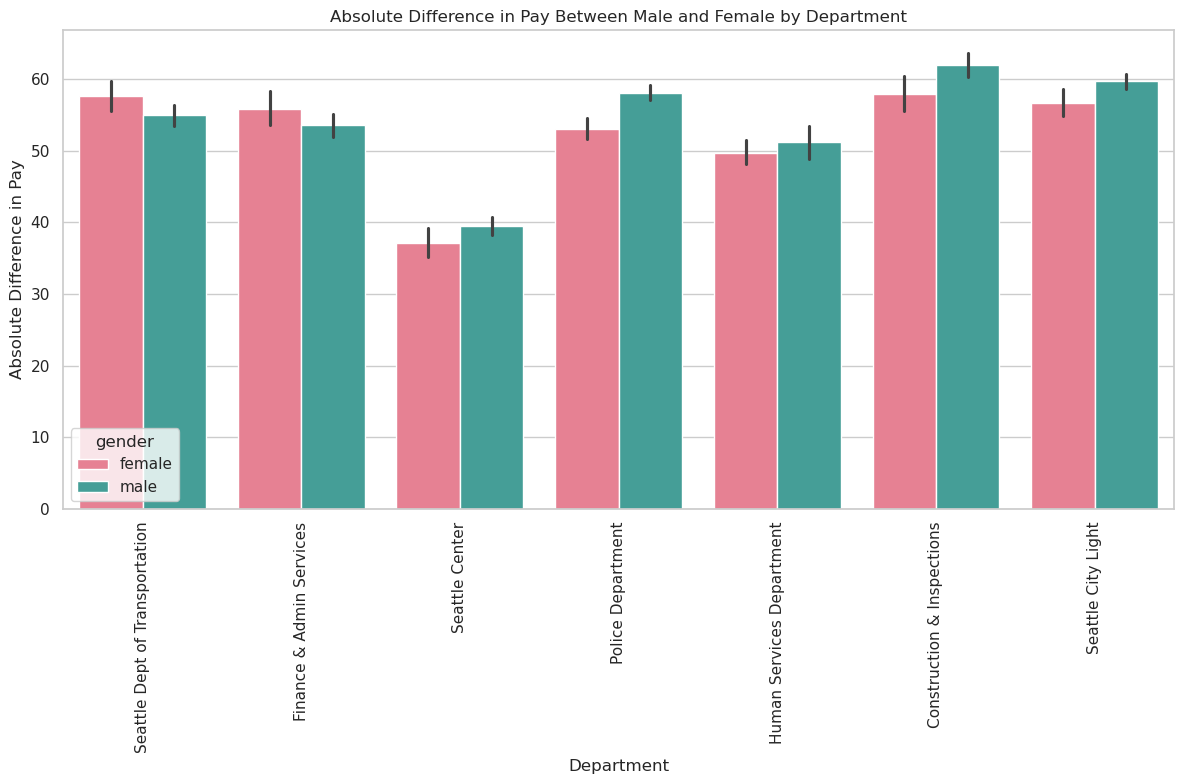

In [95]:
df = pd.DataFrame(avg_pay_seattle).T.reset_index()
df.columns = ['Gender', 'Department', 'ppl in group', 'Pay']
df['Pay'] = df['Pay'].astype(float)

male_pay = df[df['Gender'] == 'male'].sort_values('Department')[['Department', 'Pay']]
female_pay = df[df['Gender'] == 'female'].sort_values('Department')[['Department', 'Pay']]

pay_difference = abs(male_pay.set_index('Department')['Pay'] - female_pay.set_index('Department')['Pay'])

pay_difference = pay_difference.reset_index()
pay_difference.columns = ['Department', 'Pay_Difference']

# NOTE FOR PRES: Seattle is MUCH better wage wise than LA
depts = pay_difference[pay_difference["Pay_Difference"] > 1]["Department"]

filt_df = filtered_df[filtered_df['Department'].isin(depts)]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=filt_df, x='Department', y='Hourly Rate ', hue="gender", palette='husl')
plt.xticks(rotation=90)
plt.title('Absolute Difference in Pay Between Male and Female by Department')
plt.xlabel('Department')
plt.ylabel('Absolute Difference in Pay')
plt.tight_layout()
plt.savefig("pic.png")
plt.show()

In [101]:
t_test_results = []

pay_male = df[(df['Gender'] == 'male')]['Pay'].to_numpy()
pay_female = df[(df['Gender'] == 'female')]['Pay'].to_numpy()

t_stat, p_value = ttest_ind(pay_male, pay_female, equal_var=False)

# NO significant pay diff

print(p_value)
print(p_value < 0.05)

0.8147975923731994
False


# Comparing Across Departments

In [142]:
dept_comp_df = pd.read_excel("./Department_Comparison.xlsx")

In [143]:
dept_comp_df

,Department_Name_SEA,Department_Name_LA,LINK_TO_DEPARTMENT_SEA,LINK_TO_DEPARTMENT_LA,COMMENT,OVERLAP,ONLY_IN_LA,ONLY_IN_SEA
0,Parks & Recreation,RECREATION AND PARKS,https://www.seattle.gov/parks,https://www.laparks.org/,NaN,0,0,0
1,Fire Department,FIRE,NaN,NaN,NaN,0,0,0
2,Seattle Dept of Transportation,TRANSPORTATION,NaN,NaN,NaN,0,0,0
3,Seattle Public Library,LIBRARY,NaN,NaN,NaN,0,0,0
4,Seattle Public Utilities,PUBLIC WORKS - SANITATION,NaN,NaN,Seems like to be a department of environment p...,0,0,0
5,Office for Civil Rights,"CIVIL, HUMAN RIGHTS, AND EQUITY DEPARTMENT",https://www.seattle.gov/civil-rights,https://civilandhumanrights.lacity.gov/,NaN,0,0,0
6,Employees' Retirement System,CITY EMPLOYEES RETIREMENT SYSTEM,https://www.seattle.gov/retirement,https://www.lacers.org/,NaN,0,0,0
7,Arts & Culture,CULTURAL AFFAIRS,https://www.seattle.gov/arts,NaN,NaN,0,0,0
8,Mayor's Office,MAYOR,NaN,NaN,NaN,0,0,0
9,Planning & Comm Development,CITY PLANNING,NaN,NaN,NaN,0,0,0


In [144]:
dept_comp_df.dropna(subset=["Department_Name_SEA", "Department_Name_LA"], inplace=True)

In [145]:
cleaned_la_df

,last_name,first_name,fms_dept,fms_department_title,job_title,mou,mou_title,regular_pay,gender,ethnicity,hourly_pay
0,ESCOBEDO,JOSE,70,Police Department,POLICE OFFICER II,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,MALE,HISPANIC,48.998316
1,VILLEGAS,JOSE,44,LIBRARY,LIBRARY ASSISTANT I,3,CLERICAL,65332.56,MALE,HISPANIC,34.937198
3,BAUTISTA,RONALD,88,Parks & Recreation,GARDENER CARETAKER,4,EQUIPMENT OPERATION AND LABOR,55628.80,MALE,HISPANIC,29.748021
4,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,21,TECHNICAL,132912.00,FEMALE,HISPANIC,71.075936
7,MINETTA,VICTORIA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,HUMAN RELATIONS ADVOCATE,1,ADMINISTRATIVE,92427.20,FEMALE,CAUCASIAN,49.426310
...,...,...,...,...,...,...,...,...,...,...,...
139990,MILES,SUSANA,70,Police Department,POLICE SERVICE REPRESENTATIVE II,3,CLERICAL,33386.40,FEMALE,HISPANIC,17.853690
139991,ALI,MAIWAND,82,Seattle Public Utilities,ENVIRONMENTAL COMPLIANCE INSPECTOR,21,TECHNICAL,6468.00,MALE,CAUCASIAN,3.458824
139993,MORENO,JOHN,70,Police Department,POLICE SERGEANT II,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",141205.07,MALE,HISPANIC,75.510733
139994,EARLY,ROBERT,86,PUBLIC WORKS - STREET SERVICES,EQUIPMENT OPERATOR,4,EQUIPMENT OPERATION AND LABOR,97488.71,MALE,BLACK,52.133000


In [146]:
replace_dict = dict(zip(dept_comp_df['Department_Name_LA'], dept_comp_df['Department_Name_SEA']))

cleaned_la_df['fms_department_title'].replace(replace_dict, inplace=True)

In [147]:
cleaned_la_df

,last_name,first_name,fms_dept,fms_department_title,job_title,mou,mou_title,regular_pay,gender,ethnicity,hourly_pay
0,ESCOBEDO,JOSE,70,Police Department,POLICE OFFICER II,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,MALE,HISPANIC,48.998316
1,VILLEGAS,JOSE,44,LIBRARY,LIBRARY ASSISTANT I,3,CLERICAL,65332.56,MALE,HISPANIC,34.937198
3,BAUTISTA,RONALD,88,Parks & Recreation,GARDENER CARETAKER,4,EQUIPMENT OPERATION AND LABOR,55628.80,MALE,HISPANIC,29.748021
4,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,21,TECHNICAL,132912.00,FEMALE,HISPANIC,71.075936
7,MINETTA,VICTORIA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,HUMAN RELATIONS ADVOCATE,1,ADMINISTRATIVE,92427.20,FEMALE,CAUCASIAN,49.426310
...,...,...,...,...,...,...,...,...,...,...,...
139990,MILES,SUSANA,70,Police Department,POLICE SERVICE REPRESENTATIVE II,3,CLERICAL,33386.40,FEMALE,HISPANIC,17.853690
139991,ALI,MAIWAND,82,Seattle Public Utilities,ENVIRONMENTAL COMPLIANCE INSPECTOR,21,TECHNICAL,6468.00,MALE,CAUCASIAN,3.458824
139993,MORENO,JOHN,70,Police Department,POLICE SERGEANT II,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",141205.07,MALE,HISPANIC,75.510733
139994,EARLY,ROBERT,86,PUBLIC WORKS - STREET SERVICES,EQUIPMENT OPERATOR,4,EQUIPMENT OPERATION AND LABOR,97488.71,MALE,BLACK,52.133000


In [148]:
def sample_group(df_group, n):
    return df_group.sample(n=n, random_state=42)

n_samples = 120

grouped_counts = cleaned_la_df.groupby('fms_department_title').size()
filtered_groups = grouped_counts[grouped_counts > n_samples].index
filtered_df = cleaned_la_df[cleaned_la_df['fms_department_title'].isin(filtered_groups)]

sampled_df = filtered_df.groupby('fms_department_title').apply(sample_group, n=n_samples).reset_index(drop=True)

print(sampled_df)

     last_name first_name fms_dept fms_department_title  \
0     CAMPBELL     DANIEL        4             AIRPORTS   
1      EDWARDS      JAMES        4             AIRPORTS   
2          SUR    FRANCIS        4             AIRPORTS   
3      JOHNSON  SHALVETTE        4             AIRPORTS   
4         CRUZ      CESAR        4             AIRPORTS   
...        ...        ...      ...                  ...   
3475   RECCHIO        IAN       87                  ZOO   
3476      BONA    MICHAEL       87                  ZOO   
3477     LYELL     ANDREW       87                  ZOO   
3478    BARNES      BRYCE       87                  ZOO   
3479     MORAN  FRANCISCO       87                  ZOO   

                                          job_title mou  \
0               AIRPORTS MAINTENANCE SUPERINTENDENT  36   
1                                  SECURITY OFFICER  18   
2                        AIRPORT POLICE OFFICER III  30   
3     COMMUNICATIONS INFORMATION REPRESENTATIVE III   3

In [149]:
# group by for SEA
filtered_df = dept_seattle[dept_seattle['gender'].isin(['male', 'female'])]
grouped_df = filtered_df.groupby(["gender", "Department"])
avg_pay_seattle = {}
for group, group_data in grouped_df:
    avg_pay_seattle[group] = {"ppl in group" : len(group_data), "pay" : group_data['Hourly Rate '].mean()}
# group by for LA
grouped_df = cleaned_la_df.groupby(["gender", "fms_department_title"])
avg_pay_la = {}
for group, group_data in grouped_df:
    avg_pay_la[group] = {"ppl in group": len(group_data), "pay": group_data["hourly_pay"].mean()}

In [150]:
avg_pay_seattle

{('female', 'Arts & Culture'): {'ppl in group': 22, 'pay': 50.03618181818181},
 ('female', 'City Auditor'): {'ppl in group': 3, 'pay': 71.156},
 ('female', 'City Budget Office'): {'ppl in group': 20, 'pay': 67.4178},
 ('female', 'Civil Service Commissions'): {'ppl in group': 7,
  'pay': 35.11485714285714},
 ('female', 'Commnty Sfty and Comm Ctr Dept'): {'ppl in group': 70,
  'pay': 49.08542714285714},
 ('female', 'Community Police Commission'): {'ppl in group': 6,
  'pay': 64.77783333333333},
 ('female', 'Construction & Inspections'): {'ppl in group': 143,
  'pay': 57.89845454545454},
 ('female', 'Education & Early Learning'): {'ppl in group': 68,
  'pay': 54.90051470588236},
 ('female', "Employees' Retirement System"): {'ppl in group': 14,
  'pay': 61.378142857142855},
 ('female', 'Ethics & Elections Commission'): {'ppl in group': 2,
  'pay': 66.49950000000001},
 ('female', 'Finance & Admin Services'): {'ppl in group': 210,
  'pay': 55.896747619047616},
 ('female', 'Fire Department'):

In [151]:
avg_pay_la

{('FEMALE', 'AIRPORTS'): {'ppl in group': 1454, 'pay': 35.71532094388337},
 ('FEMALE', 'ANIMAL SERVICES'): {'ppl in group': 257,
  'pay': 29.88943498616284},
 ('FEMALE', 'BUILDING AND SAFETY'): {'ppl in group': 237,
  'pay': 37.1564431733568},
 ('FEMALE', 'CANNABIS REGULATION'): {'ppl in group': 5,
  'pay': 19.97022459893048},
 ('FEMALE', 'CITY ADMINISTRATIVE OFFICER'): {'ppl in group': 91,
  'pay': 59.23193906093907},
 ('FEMALE', 'CITY ATTORNEY'): {'ppl in group': 814, 'pay': 58.92774864996255},
 ('FEMALE', 'CITY EMPLOYEES RETIREMENT SYSTEM'): {'ppl in group': 87,
  'pay': 37.62596545577478},
 ('FEMALE', 'CITY ETHICS COMMISSION'): {'ppl in group': 17,
  'pay': 47.20996288140924},
 ('FEMALE', 'CITY PLANNING'): {'ppl in group': 253, 'pay': 40.25553389275221},
 ('FEMALE', 'CONTROLLER'): {'ppl in group': 94, 'pay': 47.06575122311981},
 ('FEMALE', 'COUNCIL'): {'ppl in group': 190, 'pay': 37.09280377146074},
 ('FEMALE', 'CULTURAL AFFAIRS'): {'ppl in group': 58,
  'pay': 37.961346487184215},

In [152]:
df_sea = pd.DataFrame(avg_pay_seattle).T.reset_index()
df_la = pd.DataFrame(avg_pay_la).T.reset_index()
df_sea.columns = ['Gender', 'Department', 'ppl in group', 'Pay']
df_la.columns = ['Gender', 'Department', 'ppl in group', 'Pay']

In [153]:
df_sea

,Gender,Department,ppl in group,Pay
0,female,Arts & Culture,22.0,50.036182
1,female,City Auditor,3.0,71.156000
2,female,City Budget Office,20.0,67.417800
3,female,Civil Service Commissions,7.0,35.114857
4,female,Commnty Sfty and Comm Ctr Dept,70.0,49.085427
...,...,...,...,...
72,male,Seattle Dept of Human Resource,28.0,69.639393
73,male,Seattle Dept of Transportation,534.0,54.980790
74,male,Seattle Public Library,230.0,41.400465
75,male,Seattle Public Utilities,744.0,53.434890


In [154]:
df_la

,Gender,Department,ppl in group,Pay
0,FEMALE,AIRPORTS,1454.0,35.715321
1,FEMALE,ANIMAL SERVICES,257.0,29.889435
2,FEMALE,BUILDING AND SAFETY,237.0,37.156443
3,FEMALE,CANNABIS REGULATION,5.0,19.970225
4,FEMALE,CITY ADMINISTRATIVE OFFICER,91.0,59.231939
...,...,...,...,...
79,MALE,Police Department,15115.0,52.731555
80,MALE,Seattle Dept of Transportation,1502.0,39.296079
81,MALE,Seattle Public Utilities,3522.0,39.640770
82,MALE,ZOO,161.0,35.865301


In [155]:
merged_df = pd.merge(df_sea, df_la, on='Department', how='inner', suffixes=('_SEA', '_LA'))

In [156]:
merged_df

,Gender_SEA,Department,ppl in group_SEA,Pay_SEA,Gender_LA,ppl in group_LA,Pay_LA
0,female,City Budget Office,20.0,67.417800,FEMALE,254.0,43.508135
1,female,City Budget Office,20.0,67.417800,MALE,161.0,46.954130
2,male,City Budget Office,17.0,66.263412,FEMALE,254.0,43.508135
3,male,City Budget Office,17.0,66.263412,MALE,161.0,46.954130
4,female,Human Services Department,236.0,49.682144,FEMALE,18.0,50.136458
5,female,Human Services Department,236.0,49.682144,MALE,23.0,43.083849
6,male,Human Services Department,92.0,51.243609,FEMALE,18.0,50.136458
7,male,Human Services Department,92.0,51.243609,MALE,23.0,43.083849
8,female,Police Department,350.0,53.108060,FEMALE,5401.0,46.690346
9,female,Police Department,350.0,53.108060,MALE,15115.0,52.731555


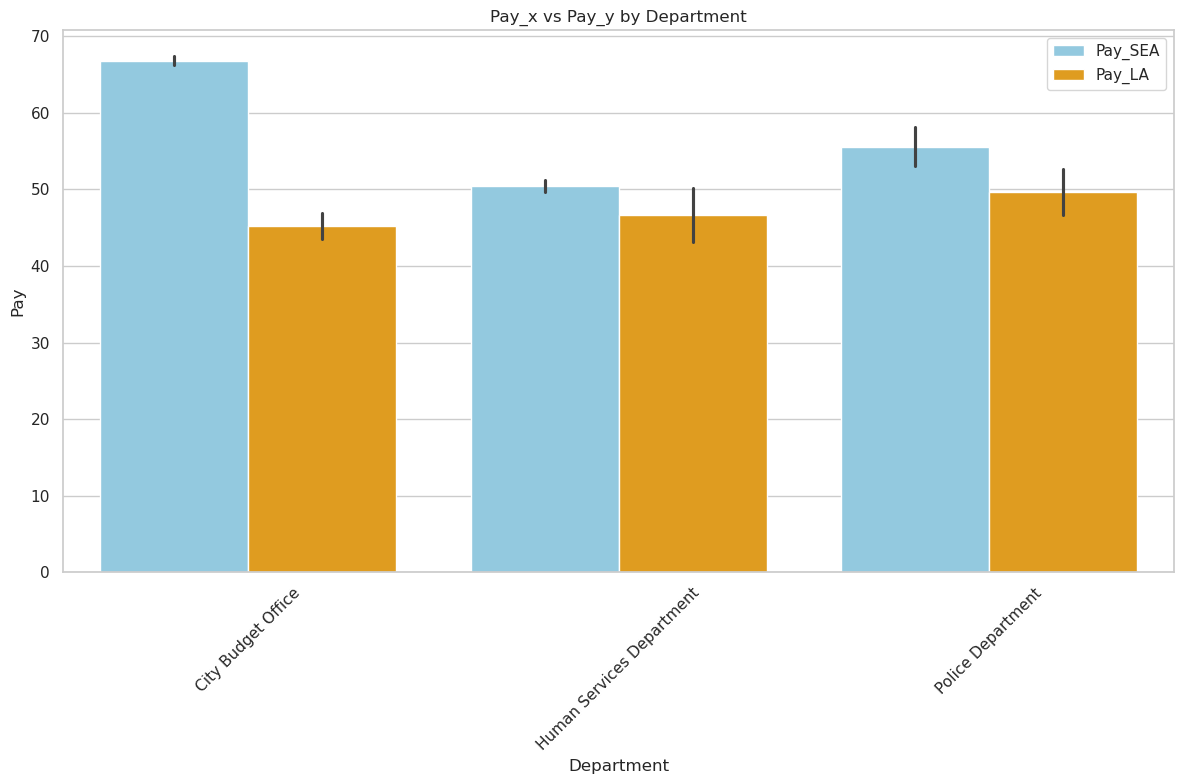

In [157]:
df_long = pd.melt(merged_df, id_vars=['Department'], value_vars=['Pay_SEA', 'Pay_LA'], var_name='Pay_type', value_name='Pay')

# Plot pay_x and pay_y by department
plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, x='Department', y='Pay', hue='Pay_type', palette=['skyblue', 'orange'])
plt.title('Pay_x vs Pay_y by Department')
plt.xlabel('Department')
plt.ylabel('Pay')
plt.legend(title=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# SEATTLE PAYS MORE ON AVG HOURLY

In [158]:
t_test_results = []

pay_sea = merged_df['Pay_SEA'].to_numpy()
pay_la = merged_df['Pay_LA'].to_numpy()

# Adjusting for diff in cost of living based on Ziyi analysis: LA 0.059 lower
pay_sea_sig = pay_sea * (1 - 0.059)

t_stat, p_value = ttest_ind(pay_sea_sig, pay_la, equal_var=False)

# SIGNIFICANT

print(p_value)
print(p_value < 0.05)

0.006041796360004949
True


# The correlation between Ethnicity and Wage in the Los Angeles City Employee Payroll Database.

# Which are the departments with higher income in the Los Angeles City Employee Payroll Database?

# How do salary levels compare between equivalent departments in Los Angeles and Seattle, given their status as major West Coast cities with similar minimum wage rates?

# What does the wage's distribution in each department look like in the bar graph in the Los Angeles City Employee Payroll Database?